##**Stock Price Prediction model Using LSTM Neural Network**

In [71]:
#This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM)
#LSTM is used to predict the closing stock price of a corporation (Apple INC.) using the past 60 day stock price.

In [72]:
#importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [73]:
ticker_symbol = 'AAPL'
# Define the date range
start_date = datetime.datetime(2012, 1, 1)
end_date = datetime.datetime(2023, 3, 8)
#get the stock quote
try:
    df = yf.download(ticker_symbol, start=start_date, end=end_date)
    print(df)
except Exception as e:
    print("An error occurred:", e)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.466095   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.533087   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.672231   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.804702   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.784391   
...                ...         ...         ...         ...         ...   
2023-03-01  146.830002  147.229996  145.009995  145.309998  144.913605   
2023-03-02  144.380005  146.710007  143.899994  145.910004  145.511978   
2023-03-03  148.039993  151.110001  147.330002  151.029999  150.617996   
2023-03-06  153.789993  156.300003  153.460007  153.830002  153.410370   
2023-03-07  153.699997  154.029999  151.130

In [74]:
#Get the no.of rows and columns in the dataset
df.shape

(2812, 6)

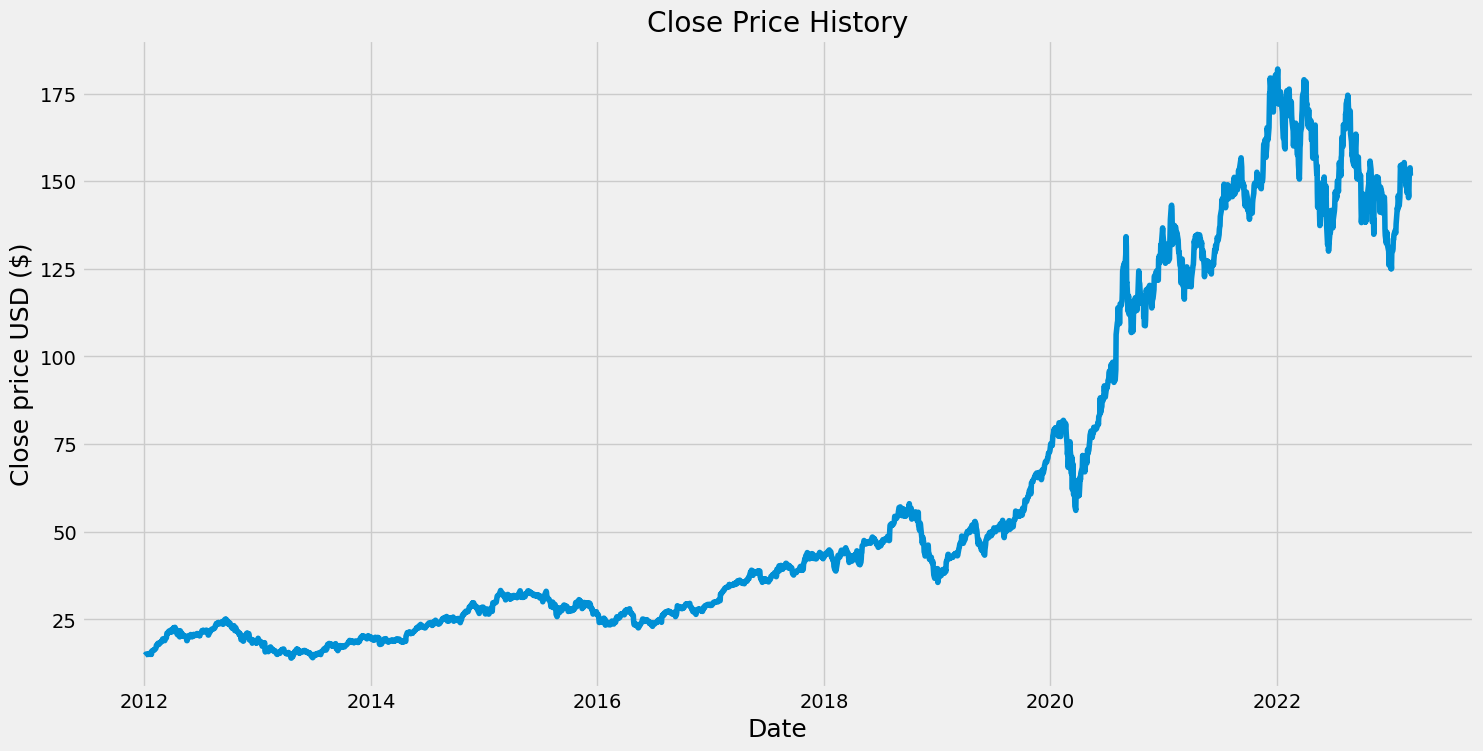

In [75]:
#Visualize the closing price history of the stock
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df.index, df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [76]:
#Create a new Dataframe with only the "Close Column"
data = df.filter(['Close'])
#Convert the dataframe into a Numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8 )

training_data_len

2250

In [77]:
#Scale the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.81566383],
       [0.83232432],
       [0.81905547]])

In [78]:
#Create the Training Data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_tarin data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if(i<=61):
    print(x_train)
    print(y_train)
    print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [79]:
#Convert the x_train and y_tarin dataset into numoy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [80]:
#Reshape the data
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2190, 60, 1)

In [81]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [82]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [83]:
#train the Model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2190/2190 [==============================] - 79s 34ms/step - loss: 5.7367e-04


In [84]:
#Create the Testing Dataset
#create  new array containing the scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#create the datasets x_test and y_test
x_test =[]
y_test= dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [85]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [86]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(562, 60, 1)

In [87]:
#Get the models Predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 2s 27ms/step


In [88]:
#Get the root mena squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.1364344668133826

<ipython-input-89-33af404c3e3f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


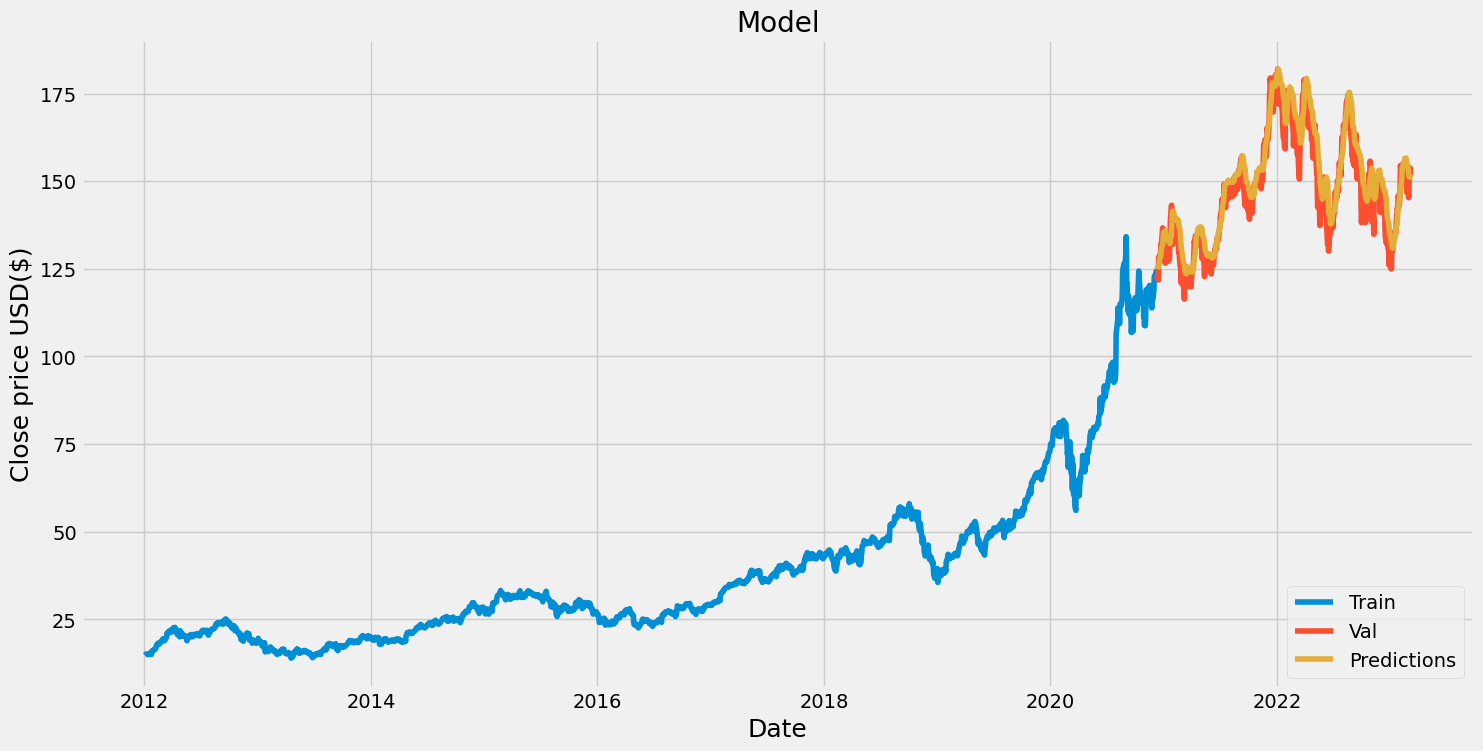

In [89]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions']=predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','Predictions'], loc ='lower right')
plt.show()

In [90]:
#show the valid and predicted prices
valid

,Close,predictions
Date,,
2020-12-10,123.239998,124.962448
2020-12-11,122.410004,125.341293
2020-12-14,121.779999,125.531670
2020-12-15,127.879997,125.535355
2020-12-16,127.809998,126.068069
...,...,...
2023-03-01,145.309998,152.717194
2023-03-02,145.910004,151.930771
2023-03-03,151.029999,151.243362


In [91]:
#Predicting the future stocks
#Get the quote
startdate = '2012-01-01'
enddate = '2023-08-23'
ticker_symbol = 'AAPL'

apple_quote = yf.download(ticker_symbol, start=startdate, end=enddate)
#create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 days closing values and convert the data frame to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_sacled = scaler.transform(last_60_days)
#creaate an empty list
x_test = []
#Append the past 60 days
x_test.append(last_60_days_sacled)
#Convert the x_test data set to an numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 28ms/step
[[179.52696]]


In [92]:
start_date2 = '2012-01-01'
end_date2 = '2023-05-07'
ticker_symbol = 'AAPL'

apple_quote2 = yf.download(ticker_symbol, start=end_date2, end=end_date2)
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:


ERROR:yfinance:['AAPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-05-07 -> 2023-05-07)')


Series([], Name: Close, dtype: float64)
